# So this is my starting work at speech recognition
Hanashi means talk or speech in Japanese.

ps: really a noob, don't hesitate to correct me :p

1. First make the audio into a sound wave and make that a pictorial representation (something known as spectrogram).




In [ ]:
!pip install pydub
!pip install matplotlib
!apt-get install ffmpeg
!pip install librosa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


44100
8192


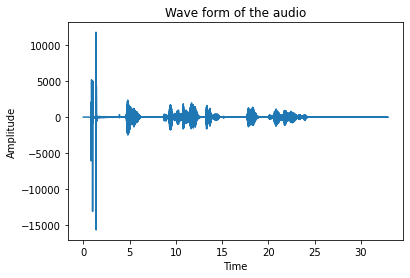

8192


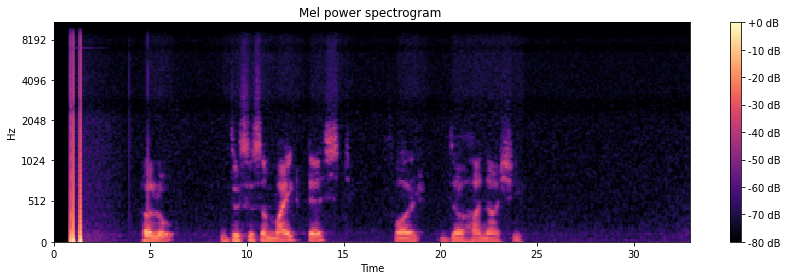

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import wave
import librosa
import librosa.display
from os import path
from pydub import AudioSegment


class audio_processing(object):
    def __init__(self, sample_src, sample_dst, resample):
        self.sample_src = sample_src
        self.sample_dst = sample_dst
        self.resample = resample

    def wav_conversion(self):
        sound = AudioSegment.from_mp3(self.sample_src)
        sound.export(self.sample_dst, format="wav")

    def wav_info(self, dst):
        audio_wave = wave.open(str(dst), "rb")

        nchannels = audio_wave.getnchannels()
        sampwidth = audio_wave.getsampwidth()
        framerate = audio_wave.getframerate()
        nframes = audio_wave.getnframes()
        comptype = audio_wave.getcomptype()
        compname = audio_wave.getcompname()
        total_time = nframes/framerate
        print(framerate)

        audio_wave.close()
        return nchannels, sampwidth, framerate, nframes, comptype, compname, total_time

    def wav_resample(self):
        nchannels, sampwidth, framerate, nframes, comptype, compname, total_time = self.wav_info(self.sample_dst)
        audio_wave = wave.open("/home/resample.wav", "wb")
        audio_wave.setnchannels(nchannels)
        audio_wave.setsampwidth(sampwidth)
        audio_wave.setframerate(self.resample)
        audio_wave.setnframes(nframes)
        audio_wave.setcomptype(comptype, compname)

        read_wave = wave.open(self.sample_dst, "rb")
        audio_wave.writeframesraw(read_wave.readframes(-1))

        audio_wave.close()
        read_wave.close()

    def wav_waveform(self):
        nchannels, sampwidth, framerate, nframes, comptype, compname, total_time = self.wav_info("/home/resample.wav")

        audio_wave = wave.open("/home/resample.wav", "rb")
        
        read_frames = audio_wave.readframes(-1)
        read_frames = np.frombuffer(read_frames, dtype="int16")

        time_axis = np.linspace(0, total_time, len(read_frames))

        audio_wave.close()
        plt.figure(1)
        plt.title("Wave form of the audio")

        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.plot(time_axis, read_frames)
        plt.show()

    def melspecgram(self):
        
        audio_path = "/home/resample.wav"
        y, sr = librosa.load(audio_path, sr=None)
        print(sr)
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(12, 4))
        librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
        plt.title('Mel power spectrogram ')
        plt.colorbar(format='%+02.0f dB')
        plt.tight_layout()



if __name__ == "__main__":
    sample_src = "/home/sample.mp3"
    sample_dst = "/home/sample.wav"
    audio_processing = audio_processing(sample_src, sample_dst, 8192) #resampling to 8192hz
    audio_processing.wav_conversion()
    audio_processing.wav_resample()
    audio_processing.wav_waveform()
    audio_processing.melspecgram()



1.19.5
11738
-15616
2
44100


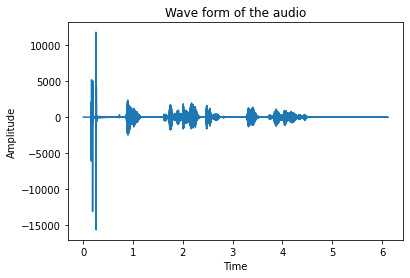

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import wave
from os import path
from pydub import AudioSegment


print(np.__version__)

src = "/home/sample.mp3"
dst = "/home/sample.wav"

sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

audio_wave = wave.open("/home/sample.wav", "rb")


total_frames = audio_wave.getnframes() 
frame_rate = audio_wave.getframerate()
sample_width = audio_wave.getsampwidth()

read_frames = audio_wave.readframes(-1)
read_frames = np.frombuffer(read_frames, dtype="int16")

time = total_frames/frame_rate

print(max(read_frames))
print(min(read_frames))
print(sample_width)
print(frame_rate)

time_axis = np.linspace(0, time, len(read_frames))

plt.figure(1)
plt.title("Wave form of the audio")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(time_axis, read_frames)
plt.show()
